In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model


In [4]:
df = pd.read_csv("/Users/bhargavibudda/Documents/GitHub/car-price-prediction-app/Training_Data_Set.csv")


In [5]:
df.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50


In [6]:
df.shape

(53515, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   53515 non-null  int64  
 1   Maker                53515 non-null  object 
 2   model                53515 non-null  object 
 3   Location             53515 non-null  object 
 4   Distance             52304 non-null  float64
 5   Owner Type           53515 non-null  object 
 6   manufacture_year     53515 non-null  int64  
 7   Age of car           53515 non-null  int64  
 8   engine_displacement  53515 non-null  int64  
 9   engine_power         52076 non-null  float64
 10  body_type            4136 non-null   object 
 11  Vroom Audit Rating   53515 non-null  int64  
 12  transmission         53515 non-null  object 
 13  door_count           53515 non-null  object 
 14  seat_count           53515 non-null  object 
 15  fuel_type            53515 non-null 

In [8]:
df.describe()

,Id,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price
count,53515.000000,5.230400e+04,53515.000000,53515.000000,53515.000000,52076.000000,53515.000000,5.351500e+04
mean,51758.000000,9.454626e+04,2010.408110,8.591890,1904.049014,100.448345,5.998374,1.098084e+06
std,15448.594165,2.755617e+05,4.650322,4.650322,1496.564596,45.330622,1.418336,8.441565e+05
min,25001.000000,0.000000e+00,1934.000000,3.000000,14.000000,10.000000,4.000000,3.000000e+00
25%,38379.500000,1.549000e+04,2008.000000,5.000000,1395.000000,73.000000,5.000000,5.051812e+05
50%,51758.000000,6.552000e+04,2011.000000,8.000000,1896.000000,91.000000,6.000000,8.854552e+05
75%,65136.500000,1.356410e+05,2014.000000,11.000000,1995.000000,125.000000,7.000000,1.477829e+06
max,78515.000000,9.899800e+06,2016.000000,85.000000,32000.000000,896.000000,8.000000,2.212078e+07


In [9]:
df.describe(include='all')

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
count,53515.000000,53515,53515,53515,5.230400e+04,53515,53515.000000,53515.000000,53515.000000,52076.000000,4136,53515.000000,53515,53515,53515,53515,5.351500e+04
unique,NaN,8,23,11,NaN,4,NaN,NaN,NaN,NaN,2,NaN,2,7,10,2,NaN
top,NaN,skoda,octavia,Coimbatore,NaN,First,NaN,NaN,NaN,NaN,compact,NaN,man,4,5,diesel,NaN
freq,NaN,21563,12619,4976,NaN,13406,NaN,NaN,NaN,NaN,4127,NaN,36734,33808,38824,27559,NaN
mean,51758.000000,NaN,NaN,NaN,9.454626e+04,NaN,2010.408110,8.591890,1904.049014,100.448345,NaN,5.998374,NaN,NaN,NaN,NaN,1.098084e+06
std,15448.594165,NaN,NaN,NaN,2.755617e+05,NaN,4.650322,4.650322,1496.564596,45.330622,NaN,1.418336,NaN,NaN,NaN,NaN,8.441565e+05
min,25001.000000,NaN,NaN,NaN,0.000000e+00,NaN,1934.000000,3.000000,14.000000,10.000000,NaN,4.000000,NaN,NaN,NaN,NaN,3.000000e+00
25%,38379.500000,NaN,NaN,NaN,1.549000e+04,NaN,2008.000000,5.000000,1395.000000,73.000000,NaN,5.000000,NaN,NaN,NaN,NaN,5.051812e+05
50%,51758.000000,NaN,NaN,NaN,6.552000e+04,NaN,2011.000000,8.000000,1896.000000,91.000000,NaN,6.000000,NaN,NaN,NaN,NaN,8.854552e+05
75%,65136.500000,NaN,NaN,NaN,1.356410e+05,NaN,2014.000000,11.000000,1995.000000,125.000000,NaN,7.000000,NaN,NaN,NaN,NaN,1.477829e+06


In [10]:
df['Maker'].unique()

array(['skoda', 'fiat', 'bmw', 'nissan', 'audi', 'toyota', 'hyundai',
       'maserati'], dtype=object)

In [11]:
new_df=df[['Maker','model','Distance','manufacture_year','transmission','fuel_type']]

KeyError: "['Distance'] not in index"

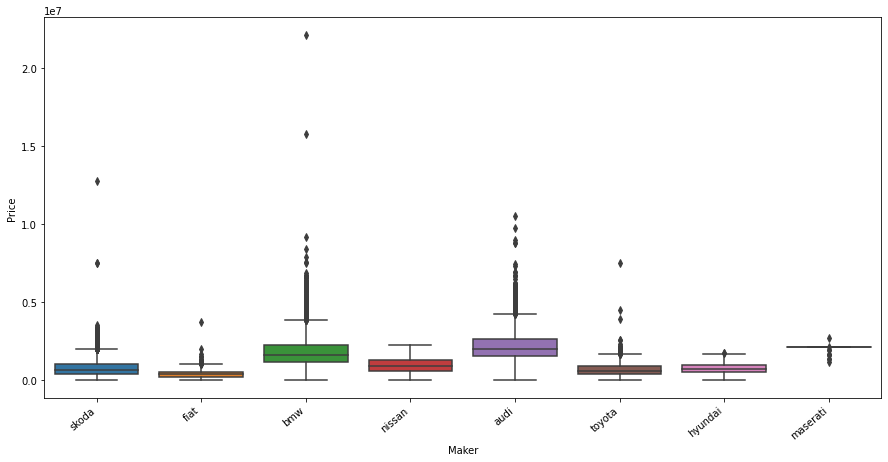

In [9]:
#RELATIONSHIP OF CAR BRAND WITH PRICE
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Maker',y='Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

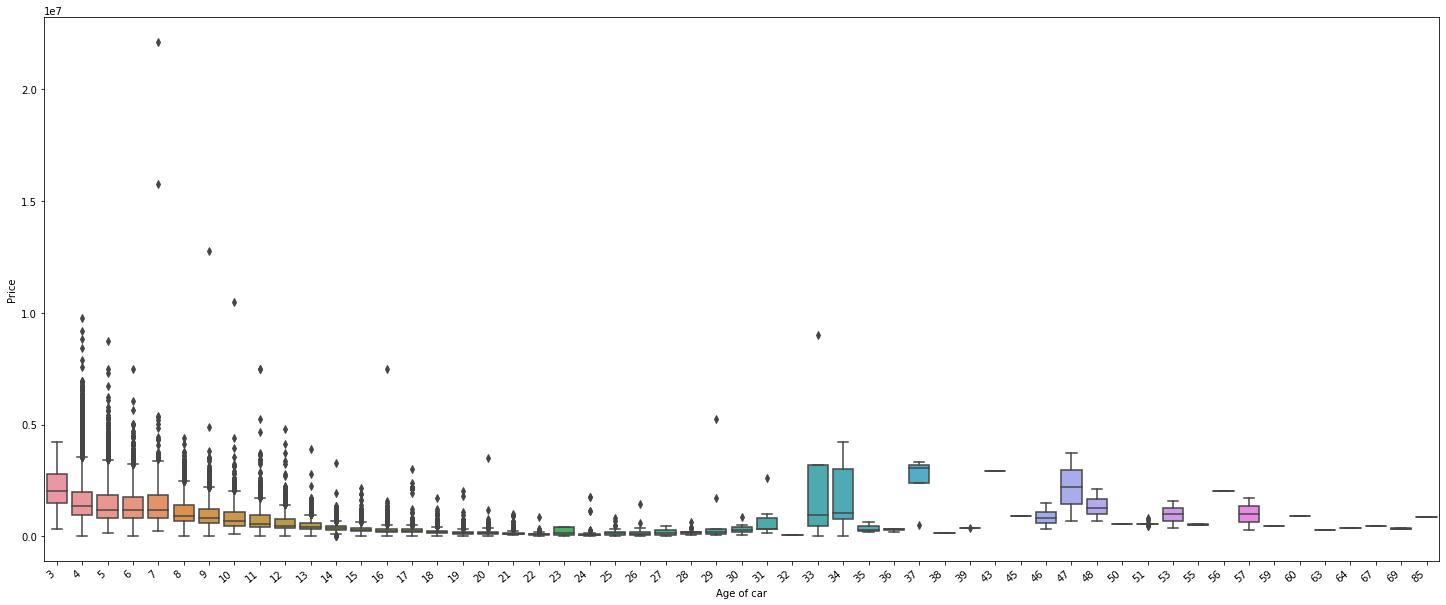

In [11]:
#RELATIONSHIP OF YEAR WITH PRICE
plt.subplots(figsize=(25,10))
ax=sns.boxplot(x='Age of car',y='Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

In [26]:
df['Distance'].unique()

KeyError: 'Distance'

KeyError: 'Distance'

In [13]:
#RELATIONSHIP OF KMS DRIVEN WITH PRICE
sns.relplot(x='Distance',y='Price',data=df,height=7,aspect=1.5)

ValueError: Could not interpret value `Distance` for parameter `x`